In [54]:
# from qiskit.quantum_info import Operator
# from qiskit.compiler import transpile
# import matplotlib.pyplot as plt
# from qiskit import QuantumCircuit

# qc = QuantumCircuit(2)
# qc.ecr(0,1)

# result = transpile(qc, basis_gates=['rzx', 'ry', 'rx', 'cx']) 
# result.draw(fold=-1)

In [1]:
# from qiskit.quantum_info import DensityMatrix
# import numpy as np
# np.set_printoptions(formatter={'complex_kind': '{:.1f}'.format})
# print(np.array(DensityMatrix.from_instruction(result)))

In [175]:
import json

with open('2D_Ising_data.json', 'r') as fp:
    datasi = json.load(fp)
with open('2D_Heisenberg_data.json', 'r') as fp:
    datash = json.load(fp)
with open('2D_FH_data.json', 'r') as fp:
    datasf = json.load(fp)

In [176]:
datash['Heisenberg4 by 4']['algorithmic_depth_qubits']

7005

In [4]:
import numpy as np

In [5]:
np.log10(3000)

3.4771212547196626

<>:38: SyntaxWarning: invalid escape sequence '\%'
<>:38: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/626864757.py:38: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


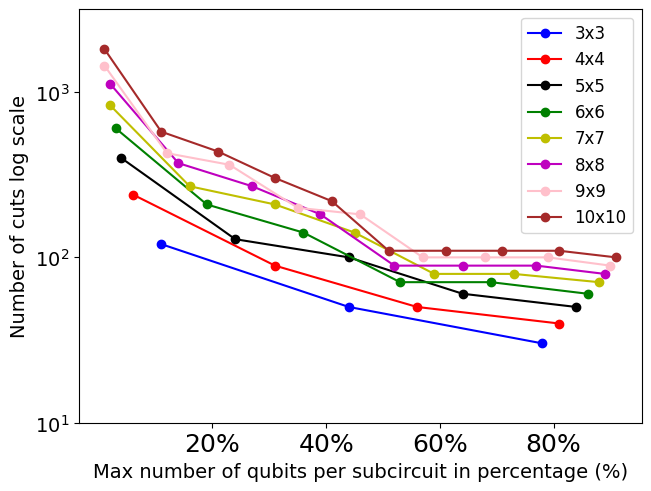

In [187]:
import matplotlib.pyplot as plt
import numpy as np
size = range(3,11)

qubits_reduction = [[],[],[],[],[],[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(np.log10(datasi['Ising'+str(idx+3)+' by '+str(idx+3)][str(s)]['gate_cuts']),2))

subcirc_pet = [[],[],[],[],[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(s/(idx+3)**2,2))

percent = {
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)],
    '5x5': [np.round(s/5**2,2) for s in range(1,25,5)],
    '6x6': [np.round(s/6**2,2) for s in range(1,36,6)],
    '7x7': [np.round(s/7**2,2) for s in range(1,49,7)],
    '8x8': [np.round(s/8**2,2) for s in range(1,64,8)],
    '9x9': [np.round(s/9**2,2) for s in range(1,81,9)],
    '10x10': [np.round(s/10**2,2) for s in range(1,100,10)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=12)
ax.set_ylabel('Number of cuts log scale', fontsize=14)
# # ax.set_title('2D square Ising model Physical Reduction')
ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=14)
ax.set_ylim([1,3.5])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained', figsize=(24,12))
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=5, fontsize=14,rotation=75)
#     multiplier += 1
# ytick = [0,1,2,3,4]
# # label the classes:
# ax.set_xticks(tick_pos, labels=['11', '44', '78', '6', '31', '56', '81', '4', '24', '44', '64', '84', '3', '', '', '53', '', '86', '2', '', '', '45', '', '', '88', '2', '', '27', '', '52', '64', '', '89', '1', '', '23', '', '', '56', '', '79', '90', '1', '', '21', '', '', '51', '', '71', '', '91']
# , fontsize=25,rotation=75)
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=30)
# print([str(int(100*list(percent.values())[i][j])) for i in range(8) for j in range(len(list(percent.values())[i]))])
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of cuts log scale', fontsize=30)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=30)
# ax.legend(loc='upper left',fontsize=24)
# ax.set_ylim([0,3.5])
# plt.show()

In [75]:
import json

with open('2D_Ising_data_80.json', 'r') as fp:
    data = json.load(fp)

In [74]:
data['Ising6 by 6']['algorithmic_depth_qubits']

175680

In [72]:
data['Ising3 by 3']['logical_depth_qubits']

361642

In [78]:
qubits_reduction

[[0.39, 0.22, 0.08],
 [0.57, 0.39, 0.24, 0.1],
 [0.72, 0.57, 0.45, 0.24, 0.12],
 [0.78, 0.54, 0.47, 0.34, 0.22, 0.1]]

<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:33: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:33: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/2910620856.py:31: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/2910620856.py:33: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


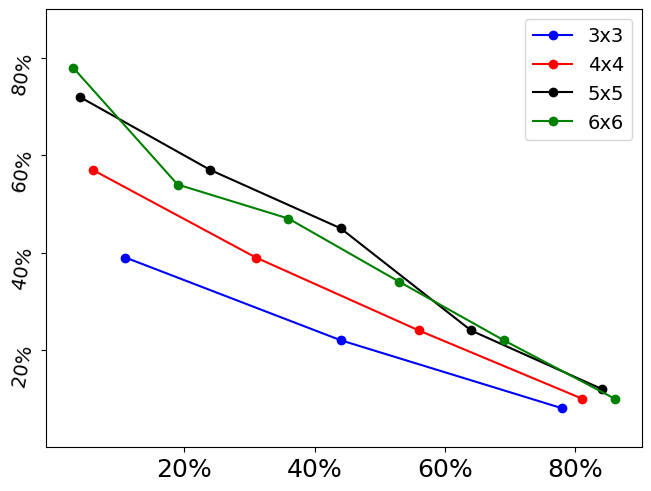

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
size = range(3,7)

qubits_reduction = [[],[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round((-data['Ising'+str(idx+3)+' by '+str(idx+3)][str(s)]['qubits_after_cutting']+data['Ising'+str(idx+3)+' by '+str(idx+3)]['overall_physical_qubits'])/data['Ising'+str(idx+3)+' by '+str(idx+3)]['overall_physical_qubits'],2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(s/(idx+3)**2,2))

percent = {
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)],
    '5x5': [np.round(s/5**2,2) for s in range(1,25,5)],
    '6x6': [np.round(s/6**2,2) for s in range(1,36,6)]
}

fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:32: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:32: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3775315606.py:30: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3775315606.py:32: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


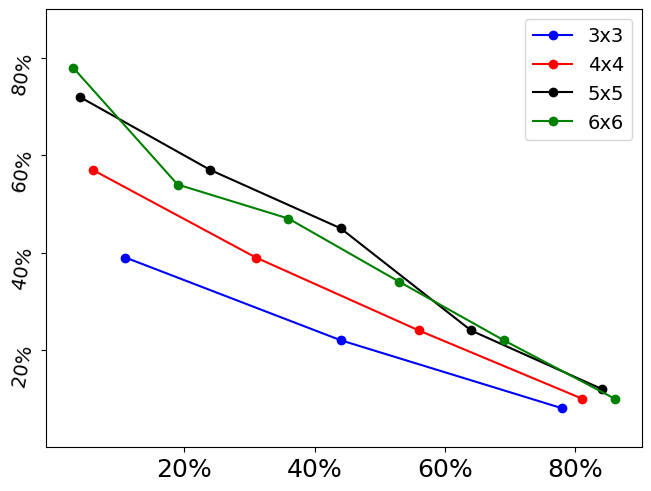

In [82]:
import matplotlib.pyplot as plt
import numpy as np
size = range(3,7)

qubits_reduction = [[],[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round((-data['Ising'+str(idx+3)+' by '+str(idx+3)][str(s)]['qubits_after_cutting']+data['Ising'+str(idx+3)+' by '+str(idx+3)]['overall_physical_qubits'])/data['Ising'+str(idx+3)+' by '+str(idx+3)]['overall_physical_qubits'],2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(s/(idx+3)**2,2))

percent = {
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)],
    '5x5': [np.round(s/5**2,2) for s in range(1,25,5)],
    '6x6': [np.round(s/6**2,2) for s in range(1,36,6)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['--', '+', 'x', '\\']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=5, fontsize=10)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# ax.set_xticks(tick_pos, labels=[str(int(100*list(percent.values())[i][j])) for i in range(4) for j in range(len(list(percent.values())[i]))], fontsize=18, rotation=75)

# # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=18)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,0.9])
# plt.show()

In [88]:
measurement

[0.03, 0.19, 0.36, 0.53, 0.69, 0.86]

<>:34: SyntaxWarning: invalid escape sequence '\%'
<>:34: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3814898063.py:34: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


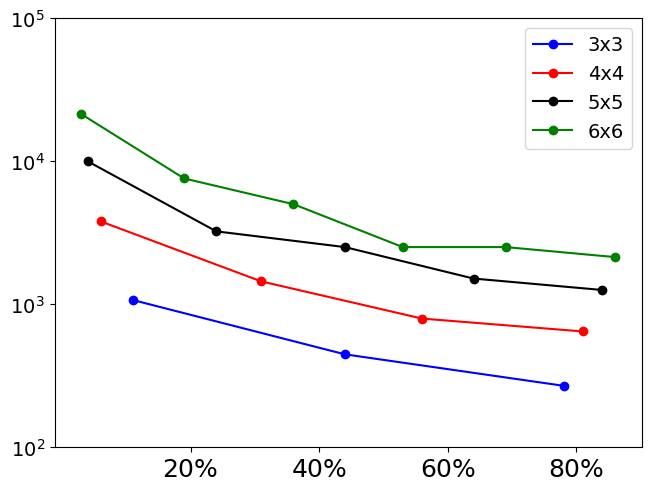

In [100]:
import matplotlib.pyplot as plt
import numpy as np
size = range(3,7)

qubits_reduction = [[],[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(np.log10(data['Ising'+str(idx+3)+' by '+str(idx+3)][str(s)]['gate_cuts']),2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(s/(idx+3)**2,2))

percent = {
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)],
    '5x5': [np.round(s/5**2,2) for s in range(1,25,5)],
    '6x6': [np.round(s/6**2,2) for s in range(1,36,6)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([2,5])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['--', '+', 'x', '\\']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=5, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(tick_pos, labels=[str(int(100*list(percent.values())[i][j])) for i in range(4) for j in range(len(list(percent.values())[i]))], fontsize=18, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=17)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,5])
# plt.show()

In [12]:
import json

with open('2D_Heisenberg_data_80.json', 'r') as fp:
    datah = json.load(fp)

In [13]:
datah['Heisenberg3 by 3']['algorithmic_depth_qubits']

48150

<>:34: SyntaxWarning: invalid escape sequence '\%'
<>:34: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/1180730529.py:34: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


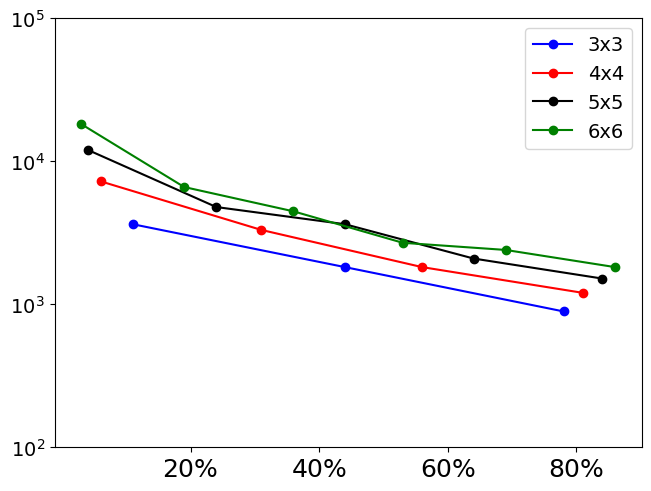

In [102]:
import matplotlib.pyplot as plt
import numpy as np
size = range(3,7)

qubits_reduction = [[],[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(np.log10(datah['Heisenberg'+str(idx+3)+' by '+str(idx+3)][str(s)]['gate_cuts']),2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(s/(idx+3)**2,2))

percent = {
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)],
    '5x5': [np.round(s/5**2,2) for s in range(1,25,5)],
    '6x6': [np.round(s/6**2,2) for s in range(1,36,6)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([2,5])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['--', '+', 'x', '\\']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=3, fontsize=10, rotation=15)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(tick_pos, labels=[str(int(100*list(percent.values())[i][j])) for i in range(4) for j in range(len(list(percent.values())[i]))], fontsize=18, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=17)
# ax.legend(loc='upper left', fontsize=11)
# ax.set_ylim([0,5])
# plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:32: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:32: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/1817349675.py:30: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/1817349675.py:32: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


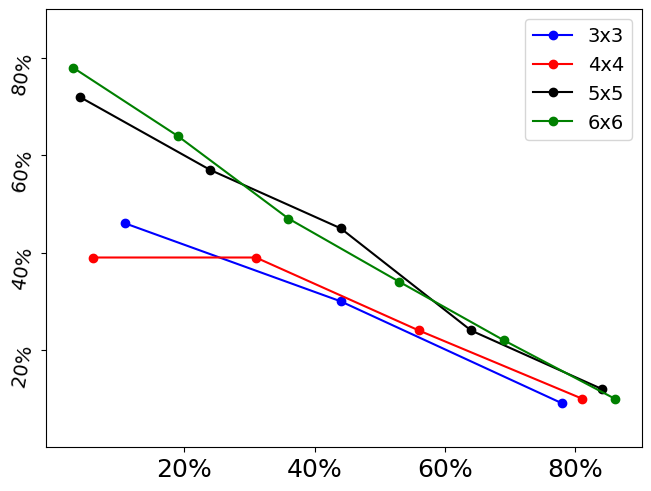

In [103]:
import matplotlib.pyplot as plt
import numpy as np
size = range(3,7)

qubits_reduction = [[],[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round((-datah['Heisenberg'+str(idx+3)+' by '+str(idx+3)][str(s)]['qubits_after_cutting']+datah['Heisenberg'+str(idx+3)+' by '+str(idx+3)]['overall_physical_qubits'])/datah['Heisenberg'+str(idx+3)+' by '+str(idx+3)]['overall_physical_qubits'],2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+3)**2, (idx+3)):
        t.append(np.round(s/(idx+3)**2,2))

percent = {
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)],
    '5x5': [np.round(s/5**2,2) for s in range(1,25,5)],
    '6x6': [np.round(s/6**2,2) for s in range(1,36,6)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['--', '+', 'x', '\\']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=5, fontsize=10)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# ax.set_xticks(tick_pos, labels=[str(int(100*list(percent.values())[i][j])) for i in range(4) for j in range(len(list(percent.values())[i]))], fontsize=18, rotation=75)

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=18)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,0.9])
# plt.show()

In [104]:
import json

with open('2D_FH_data_80.json', 'r') as fp:
    dataf = json.load(fp)

In [17]:
# dataf['FH5 by 5']['algorithmic_depth_qubits']

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/4168922350.py:28: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/4168922350.py:30: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


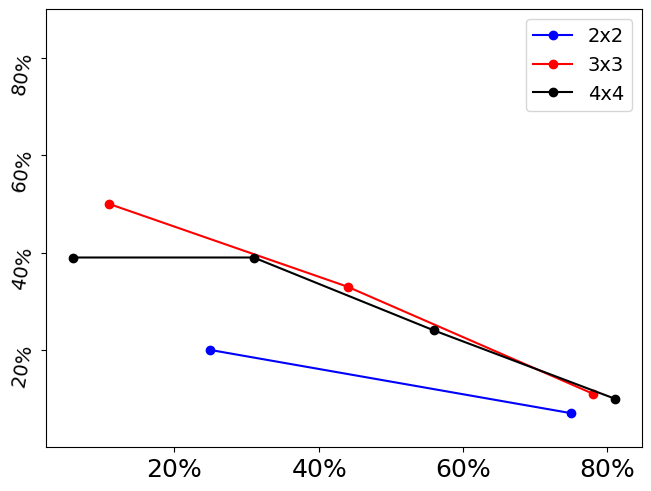

In [105]:
import matplotlib.pyplot as plt
import numpy as np

qubits_reduction = [[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+2)**2, (idx+2)):
        t.append(np.round((-dataf['FH'+str(idx+2)+' by '+str(idx+2)][str(s)]['qubits_after_cutting']+dataf['FH'+str(idx+2)+' by '+str(idx+2)]['overall_physical_qubits'])/dataf['FH'+str(idx+2)+' by '+str(idx+2)]['overall_physical_qubits'],2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+2)**2, (idx+2)):
        t.append(np.round(s/(idx+2)**2,2))

percent = {
    '2x2': [np.round(s/2**2,2) for s in range(1,4,2)],
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['--', '+', 'x']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=5, fontsize=10)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# ax.set_xticks(tick_pos, labels=[str(int(100*list(percent.values())[i][j])) for i in range(3) for j in range(len(list(percent.values())[i]))], fontsize=18)

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=18)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,0.6])
# plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\%'
<>:29: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/401356748.py:29: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


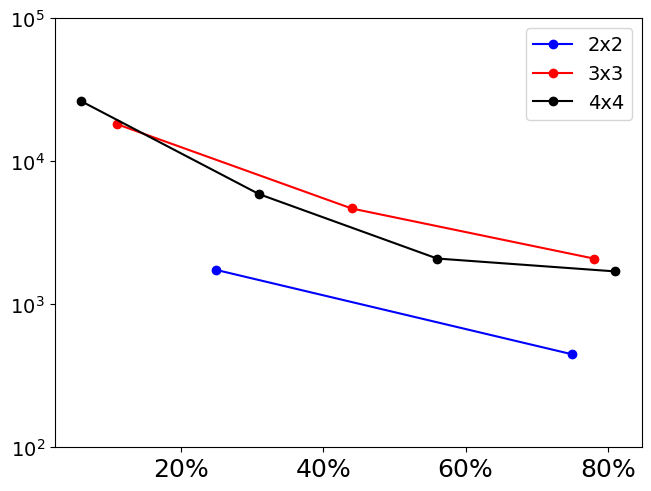

In [106]:
qubits_reduction = [[],[],[]]
for idx, t in enumerate(qubits_reduction):
    for s in range(1,(idx+2)**2, (idx+2)):
        t.append(np.round(np.log10(dataf['FH'+str(idx+2)+' by '+str(idx+2)][str(s)]['gate_cuts']),2))

subcirc_pet = [[],[],[],[]]
for idx, t in enumerate(subcirc_pet):
    for s in range(1,(idx+2)**2, (idx+2)):
        t.append(np.round(s/(idx+2)**2,2))

percent = {
    '2x2': [np.round(s/2**2,2) for s in range(1,4,2)],
    '3x3': [np.round(s/3**2,2) for s in range(1,9,3)],
    '4x4': [np.round(s/4**2,2) for s in range(1,16,4)]
}
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in percent.items():
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([2,5])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['--', '+', 'x']
# for attribute, measurement in percent.items():
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=5, fontsize=10)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(tick_pos, labels=[str(int(100*list(percent.values())[i][j])) for i in range(3) for j in range(len(list(percent.values())[i]))], fontsize=18)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit in percentage (%)', fontsize=17)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,5])
# plt.show()

In [107]:
datah['Heisenberg3 by 3'].keys()

dict_keys(['longest_path', 'two_qubit_gates', 'overall_physical_qubits', 'overall_runtime', 'logical_depth_qubits', 'algorithmic_depth_qubits', 'logical_qubits', '1', '4', '7'])

In [108]:
with open('qft_data copy.json', 'r') as fp:
    data_qfts = json.load(fp)

In [109]:
with open('qft_data.json', 'r') as fp:
    data_qft = json.load(fp)

In [110]:
np.log10(data_qfts['qft30']['overall_physical_qubits'])

4.866842408452845

In [111]:
data_qft['qft5']['algorithmic_depth_qubits']

184

<>:41: SyntaxWarning: invalid escape sequence '\%'
<>:43: SyntaxWarning: invalid escape sequence '\%'
<>:41: SyntaxWarning: invalid escape sequence '\%'
<>:43: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3335257853.py:41: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3335257853.py:43: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


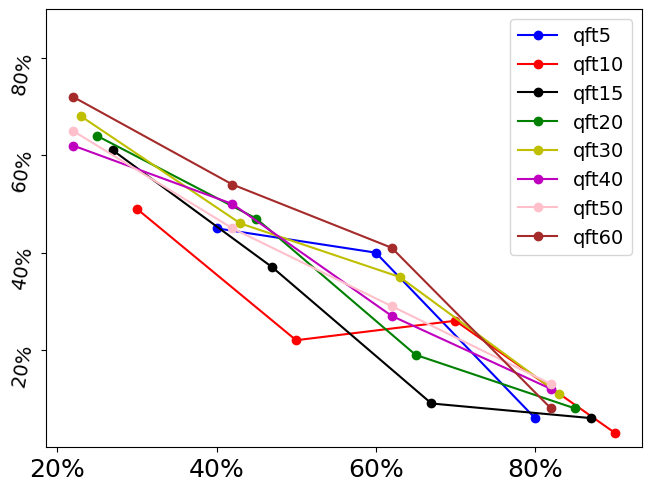

In [113]:
qft_qubits_reduction = [[],[],[],[],[],[],[],[]]
for idx, t in enumerate(qft_qubits_reduction[:4]):
    if idx == 0:
        for s in range(4):
            if data_qft['qft'+str((1+idx)*5)][str(1+s*(1+idx))]['qubits_after_cutting']==0:
                t.append(1)
            else:
                t.append(np.round((-data_qft['qft'+str((1+idx)*5)][str(1+s*(1+idx))]['qubits_after_cutting']+data_qft['qft'+str((1+idx)*5)]['overall_physical_qubits'])/data_qft['qft'+str((1+idx)*5)]['overall_physical_qubits'],2))
    else:
        for s in range(5):
            # print(str(1+s*(1+idx)))
            if data_qft['qft'+str((1+idx)*5)][str(1+s*(1+idx))]['qubits_after_cutting']==0:
                t.append(1)
            else:
                t.append(np.round((-data_qft['qft'+str((1+idx)*5)][str(1+s*(1+idx))]['qubits_after_cutting']+data_qft['qft'+str((1+idx)*5)]['overall_physical_qubits'])/data_qft['qft'+str((1+idx)*5)]['overall_physical_qubits'],2))

for idx, t in enumerate(qft_qubits_reduction[4:]):
        for s in range(5):
            if data_qfts['qft'+str((3+idx)*10)][str(1+s*(3+idx)*2)]['qubits_after_cutting']==0:
                t.append(1)
            else:
                t.append(np.round((-data_qfts['qft'+str((3+idx)*10)][str(1+s*(3+idx)*2)]['qubits_after_cutting']+data_qfts['qft'+str((3+idx)*10)]['overall_physical_qubits'])/data_qfts['qft'+str((3+idx)*10)]['overall_physical_qubits'],2))

subcirc_pet = [[np.round(1/5,2),np.round(2/5,2),np.round(3/5,2),np.round(4/5,2)],[np.round(1/10,2),np.round(3/10,2),np.round(5/10,2),np.round(7/10,2),np.round(9/10,2)],[np.round(1/15,2),np.round(4/15,2),np.round(7/15,2),np.round(10/15,2),np.round(13/15,2)],
               [np.round(1/20,2),np.round(5/20,2),np.round(9/20,2),np.round(13/20,2),np.round(17/20,2)],[np.round(1/30,2),np.round(7/30,2),np.round(13/30,2),np.round(19/30,2),np.round(25/30,2)],[np.round(1/40,2),np.round(9/40,2),np.round(17/40,2),np.round(25/40,2),np.round(33/40,2)],
               [np.round(1/50,2),np.round(11/50,2),np.round(21/50,2),np.round(31/50,2),np.round(41/50,2)],[np.round(1/60,2),np.round(13/60,2),np.round(25/60,2),np.round(37/60,2),np.round(49/60,2)]]
for i in qft_qubits_reduction:
    i.pop(0)
for i in subcirc_pet:
    i.pop(0)  
n = ['qft5','qft10','qft15','qft20','qft30','qft40','qft50','qft60']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qft_qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()
# n = ['qft5','qft10','qft15','qft20','qft30','qft40','qft50','qft60']
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']
# for attribute, measurement in zip(n,subcirc_pet):
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qft_qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], labels=n, fontsize=18)

# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max subcircuit qubit number (not shown) & qubit number', fontsize=14)
# # ax.legend(loc='upper left')
# ax.set_ylim([0,0.8])
# plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\%'
<>:37: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3887401294.py:37: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


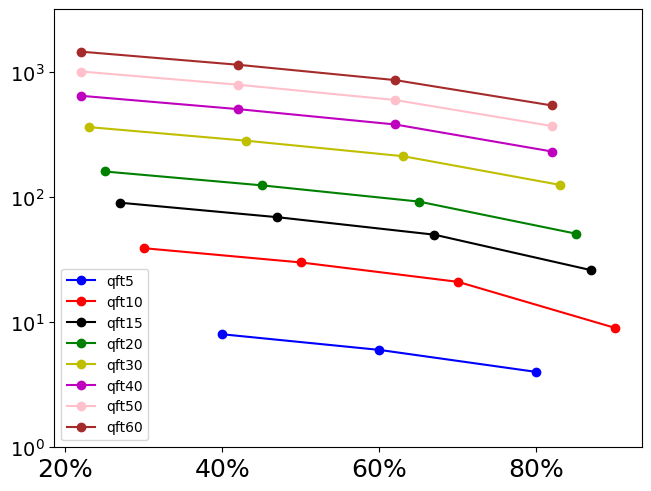

In [124]:
qft_gate_cuts = [[],[],[],[],[],[],[],[]]
for idx, t in enumerate(qft_gate_cuts[:4]):
    if idx == 0:
        for s in range(4):
            # print(str(1+s*(1+idx)))
            t.append(data_qft['qft'+str((1+idx)*5)][str(1+s*(1+idx))]['gate_cuts'])
    else:
        for s in range(5):
            # print(str(1+s*(1+idx)))
            t.append(data_qft['qft'+str((1+idx)*5)][str(1+s*(1+idx))]['gate_cuts'])
for idx, t in enumerate(qft_gate_cuts[4:]):
    for s in range(5):
        # print(str(1+s*(1+idx)))
        t.append(data_qfts['qft'+str((3+idx)*10)][str(1+s*(3+idx)*2)]['gate_cuts'])

subcirc_pet = [[np.round(1/5,2),np.round(2/5,2),np.round(3/5,2),np.round(4/5,2)],[np.round(1/10,2),np.round(3/10,2),np.round(5/10,2),np.round(7/10,2),np.round(9/10,2)],[np.round(1/15,2),np.round(4/15,2),np.round(7/15,2),np.round(10/15,2),np.round(13/15,2)],
               [np.round(1/20,2),np.round(5/20,2),np.round(9/20,2),np.round(13/20,2),np.round(17/20,2)],[np.round(1/30,2),np.round(7/30,2),np.round(13/30,2),np.round(19/30,2),np.round(25/30,2)],[np.round(1/40,2),np.round(9/40,2),np.round(17/40,2),np.round(25/40,2),np.round(33/40,2)],
               [np.round(1/50,2),np.round(11/50,2),np.round(21/50,2),np.round(31/50,2),np.round(41/50,2)],[np.round(1/60,2),np.round(13/60,2),np.round(25/60,2),np.round(37/60,2),np.round(49/60,2)]]
for i in qft_gate_cuts:
    i.pop(0)
for i in subcirc_pet:
    i.pop(0)   
n = ['qft5','qft10','qft15','qft20','qft30','qft40','qft50','qft60']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, [np.log10(qft_gate_cuts[idx][i]) for i in range(len(qft_gate_cuts[idx]))], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='lower left', fontsize=10)
ax.set_ylim([0,3.5])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O']
# for attribute, measurement in zip(n,subcirc_pet):
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], [np.round(np.log10(qft_gate_cuts[multiplier][i]),2) for i in range(len(qft_gate_cuts[multiplier]))], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5], labels=n, fontsize=18)
# ytick = [0,1,2,3,4]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max subcircuit qubit number (not shown) & qubit number', fontsize=14)
# # ax.legend(loc='upper left')
# ax.set_ylim([0,3.5])
# plt.show()

In [125]:
with open('block_encoding_data.json', 'r') as fp:
    bc = json.load(fp)
with open('QAOA_data.json', 'r') as fp:
    Q = json.load(fp)
with open('QPE_data.json', 'r') as fp:
    QPE = json.load(fp)
with open('random_data.json', 'r') as fp:
    random = json.load(fp)

In [126]:
np.log10(Q['QAOA100']['overall_physical_qubits'])

5.26495941769054

In [127]:
bc['block_encoding5']['algorithmic_depth_qubits']

18432

In [130]:
print(qubits_reduction)

[[0.5, 0.19, 0.13], [0.6, 0.12, 0.06, -0.01, -0.08], [0.76, 0.01, 0.26, 0.21, 0.15, 0.12, 0.07], [0.79, 0.37, 0.33, 0.01, -0.1, -0.14, -0.11, 0.12, 0.08]]


In [131]:
subcirc_pet

[[0.4, 0.6, 0.8],
 [0.3, 0.5, 0.7, 0.9],
 [0.27, 0.47, 0.67, 0.87],
 [0.25, 0.45, 0.65, 0.85],
 [0.23, 0.43, 0.63, 0.83],
 [0.22, 0.42, 0.62, 0.82],
 [0.22, 0.42, 0.62, 0.82],
 [0.22, 0.42, 0.62, 0.82]]

<>:50: SyntaxWarning: invalid escape sequence '\%'
<>:52: SyntaxWarning: invalid escape sequence '\%'
<>:50: SyntaxWarning: invalid escape sequence '\%'
<>:52: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/2999317921.py:50: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/2999317921.py:52: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


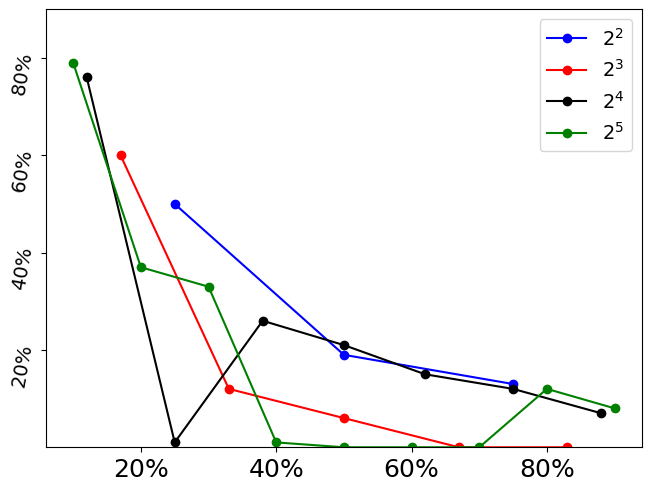

In [134]:
qubits_reduction = [[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(1,(2+idx)*2):
            t.append(np.round((bc['block_encoding'+str((idx+2))]['overall_physical_qubits']-bc['block_encoding'+str((idx+2))][str(s)]['qubits_after_cutting'])/bc['block_encoding'+str((idx+2))]['overall_physical_qubits'],2))


# subcirc_pet = [[np.round(j/i,2) for j in range(1,i)] for i in [4,6,8,10]]
n = [r'$2^2$',r'$2^3$',r'$2^4$',r'$2^5$']
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))]
#     print([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier]) 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=50)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# ax.set_xticks(pos, labels=['25', '50', '75', '17', '33', '50', '67', '83', '12', '', '', '', '', '', '88', '', '', '', '', '50', '', '', '', '90'], fontsize=18, rotation=75)

# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit', fontsize=18)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,0.9])
# plt.show()
for idx,i in enumerate(qubits_reduction):
     for jdx,j in enumerate(i):
          if j < 0:
               qubits_reduction[idx][jdx]=0
subcirc_pet = [[np.round(j/i,2) for j in range(1,i)] for i in [4,6,8,10]]
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()

In [32]:
# qubits_reduction = [[],[],[],[]]

# for idx, t in enumerate(qubits_reduction):
#         for s in range(1,(1+idx)*2):
#             t.append(np.round((bc['block_encoding'+str((idx+1)*2)]['overall_physical_qubits']-bc['block_encoding'+str((idx+1)*2)][str(s)]['qubits_after_cutting'])/bc['block_encoding'+str((idx+1)*2)]['overall_physical_qubits'],2))


# subcirc_pet = [[np.round(j/i,2) for j in range(1,i)] for i in range(2,9,2)]
# n = [r'2^2',r'2^4',r'2^6',r'2^8']
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     ax.bar_label(rects, padding=6, fontsize=10)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(pos, labels=[str(int(100*subcirc_pet[i][j]))+'%' for i in range(4) for j in range(len(subcirc_pet[i]))], fontsize=12, rotation=75)

# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Physical qubits reduction ratio', fontsize=14)
# # ax.set_title('2D square Ising model Physical Reduction')
# ax.set_xlabel('Max number of qubits per subcircuit', fontsize=14)
# ax.legend(loc='upper left')
# ax.set_ylim([0,0.3])
# plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/250286533.py:23: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


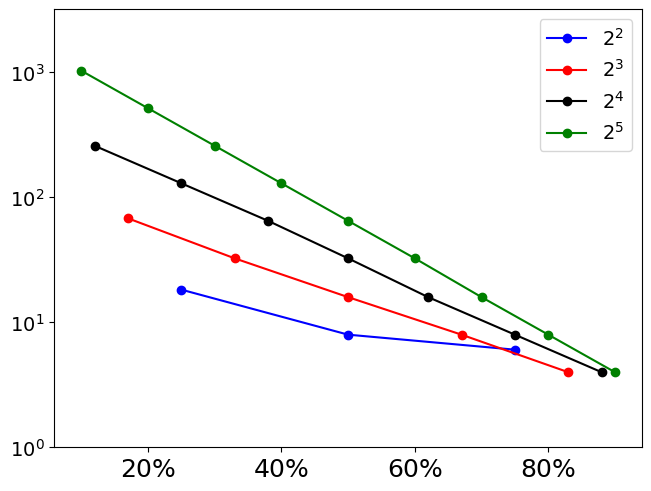

In [141]:
qubits_reduction = [[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(1,(2+idx)*2):
            t.append(np.round(np.log10(bc['block_encoding'+str((idx+2))][str(s)]['gate_cuts']),2))


subcirc_pet = [[np.round(j/i,2) for j in range(1,i)] for i in [4,6,8,10]]
n = [r'$2^2$',r'$2^3$',r'$2^4$',r'$2^5$']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,3.5])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=8, fontsize=16, rotation=75)
#     multiplier += 1
# print([str(int(100*subcirc_pet[i][j]))for i in range(4) for j in range(len(subcirc_pet[i]))])
# # label the classes:
# ax.set_xticks(pos, labels=['25', '50', '75', '17', '33', '50', '67', '83', '12', '', '', '', '', '', '88', '', '', '', '', '50', '', '', '', '90'], fontsize=18, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit', fontsize=18)
# ax.legend(loc='upper left', fontsize=14)
# ax.set_ylim([0,3.3])
# plt.show()

In [137]:
QPE['QPE8']['algorithmic_depth_qubits']

45895

In [35]:
np.log10(45895)

4.661765374193252

In [36]:
import numpy as np

In [37]:

np.log10(9384)

3.9723879991074726

<>:19: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:19: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/1195396950.py:19: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/1195396950.py:21: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


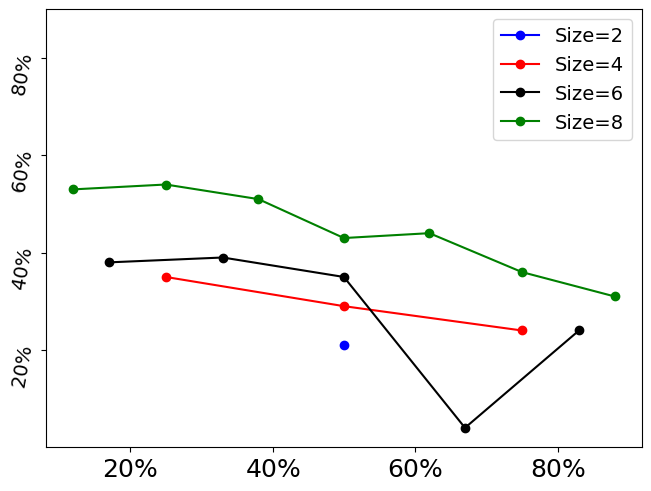

In [144]:
qubits_reduction = [[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(1,(1+idx)*2):
            t.append(np.round((QPE['QPE'+str((idx+1)*2)]['overall_physical_qubits']-QPE['QPE'+str((idx+1)*2)][str(s)]['qubits_after_cutting'])/QPE['QPE'+str((idx+1)*2)]['overall_physical_qubits'],2))


subcirc_pet = [[np.round(j/i,2) for j in range(1,i)] for i in range(2,9,2)]
n = ['Size=2','Size=4','Size=6','Size=8']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# ax.set_xticks(pos, labels=['50', '25', '50', '75', '17', '', '50', '', '83', '12', '', '', '50', '', '', '88'], fontsize=18, rotation=75)

# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit', fontsize=18)
# ax.legend(loc='upper left', fontsize=16)
# ax.set_ylim([0,0.6])
# plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/2557079339.py:23: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


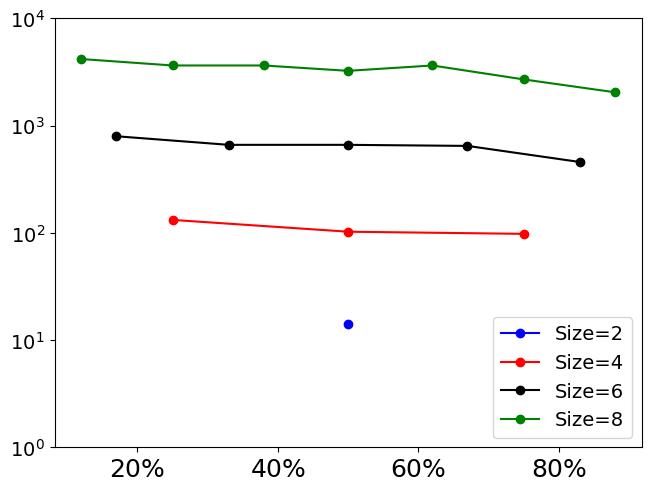

In [140]:
qubits_reduction = [[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(1,(1+idx)*2):
            t.append(np.round(np.log10(QPE['QPE'+str((idx+1)*2)][str(s)]['gate_cuts']),2))


subcirc_pet = [[np.round(j/i,2) for j in range(1,i)] for i in range(2,9,2)]
n = ['Size=2','Size=4','Size=6','Size=8']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='lower right', fontsize=14)
ax.set_ylim([0,4])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1
# print([str(int(100*subcirc_pet[i][j]))for i in range(4) for j in range(len(subcirc_pet[i]))])
# # label the classes:
# ax.set_xticks(pos, labels=['50', '25', '50', '75', '17', '', '50', '', '83', '12', '', '', '50', '', '', '88'], fontsize=18, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit', fontsize=18)
# ax.legend(loc='upper left',fontsize=18)
# ax.set_ylim([0,4.5])
# plt.show()

In [146]:
Q['QAOA100']['algorithmic_depth_qubits']

3259

In [41]:
np.log10(3259)

3.513084360465144

<>:19: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:19: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3567890840.py:19: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/3567890840.py:21: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


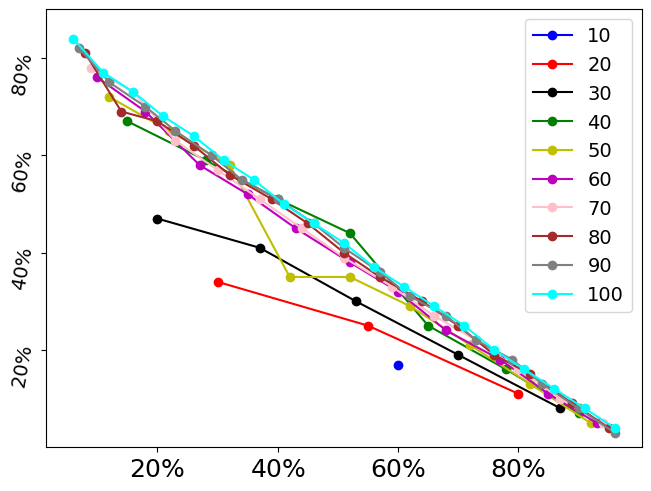

In [150]:
qubits_reduction = [[],[],[],[],[],[],[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(6,(1+idx)*10,5):
            t.append(np.round((Q['QAOA'+str((idx+1)*10)]['overall_physical_qubits']-Q['QAOA'+str((idx+1)*10)][str(s)]['qubits_after_cutting'])/Q['QAOA'+str((idx+1)*10)]['overall_physical_qubits'],2))


subcirc_pet = [[np.round(j/i,2) for j in range(6,i,5)] for i in range(10,101,10)]
n = [str(i*10) for i in range(1,11)]
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown','gray','cyan']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()

# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
# pos = []
# for measurement in subcirc_pet:
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# # ax.set_xticks(pos, labels=[str(int(100*subcirc_pet[i][j]))+'%' for i in range(4) for j in range(len(subcirc_pet[i]))], fontsize=18, rotation=75)
# ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], [str(10*(i+1)) for i in [0,1,2,3,4,5,6,7,8,9]], fontsize=16, rotation=30)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max subcircuit qubit number (not shown) & qubit number', fontsize=14)
# # ax.legend(loc='upper left')
# # ax.set_ylim([0,0.6])
# plt.show()

<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/2820543947.py:23: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


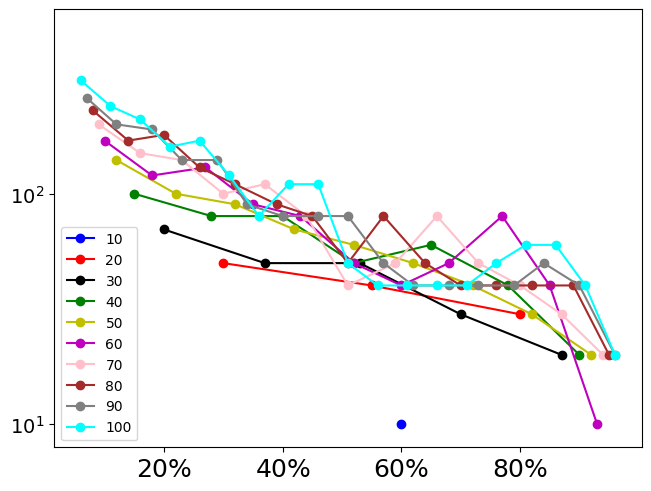

In [157]:
qubits_reduction = [[],[],[],[],[],[],[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(6,(1+idx)*10,5):
            t.append(Q['QAOA'+str((idx+1)*10)][str(s)]['gate_cuts'])


subcirc_pet = [[np.round(j/i,2) for j in range(6,i,5)] for i in range(10,101,10)]
# n = ['size=4','size=6','size=8','size=10']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown','gray','cyan']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, [np.log10(q) for q in qubits_reduction[idx]], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='lower left', fontsize=10)
ax.set_ylim([0.9,2.8])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
# pos = []
# for measurement in subcirc_pet:
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# # ax.set_xticks(pos, labels=[str(int(100*subcirc_pet[i][j]))+'%' for i in range(4) for j in range(len(subcirc_pet[i]))], fontsize=12, rotation=75)
# ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], [str(10*(i+1)) for i in [0,1,2,3,4,5,6,7,8,9]], fontsize=16, rotation=30)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Number of cuts', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max subcircuit qubit number (not shown) & qubit number', fontsize=14)
# ax.set_yticks([0,100,200,300], [0,100,200,300], fontsize=16, rotation=80)
# # ax.legend(loc='upper left')
# # ax.set_ylim([0,100])
# plt.show()

In [167]:
random['random20']['algorithmic_depth_qubits']

22722

In [45]:
np.log10(22722)

4.35644655550447

In [171]:
subcirc_pet

[[0.2, 0.6],
 [0.1, 0.3, 0.5, 0.7, 0.9],
 [0.07, 0.2, 0.33, 0.47, 0.6, 0.73, 0.87],
 [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]]

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/957107372.py:28: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/957107372.py:30: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)


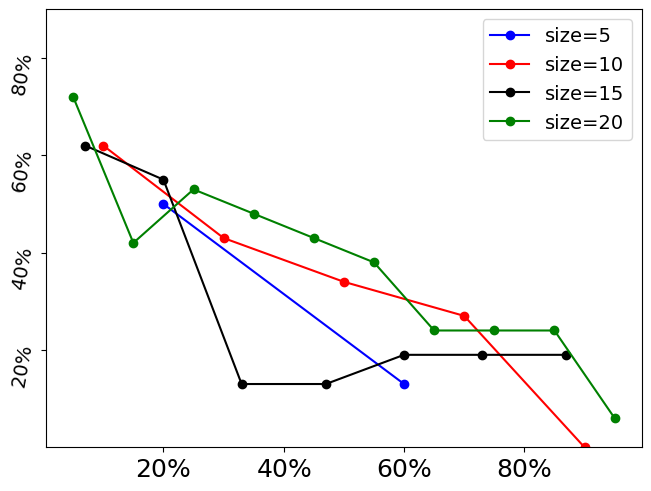

In [173]:
qubits_reduction = [[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(1,(1+idx)*5,2):
            if np.round((random['random'+str((idx+1)*5)]['overall_physical_qubits']-random['random'+str((idx+1)*5)][str(s)]['qubits_after_cutting'])/random['random'+str((idx+1)*5)]['overall_physical_qubits'],2)<0:
                 t.append(0)
            else:
                t.append(np.round((random['random'+str((idx+1)*5)]['overall_physical_qubits']-random['random'+str((idx+1)*5)][str(s)]['qubits_after_cutting'])/random['random'+str((idx+1)*5)]['overall_physical_qubits'],2))


subcirc_pet = [[np.round(j/i,2) for j in range(1,i,2)] for i in range(5,21,5)]
n = ['size=5','size=10','size=15','size=20']
fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m']
idx = 0

# for idx, i in enumerate(qubits_reduction):
#      for jdx, j in enumerate(i):
#           if j<0:
#                qubits_reduction[idx][jdx]=0
# print(qubits_reduction)
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
ytick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in ytick]
ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# label the classes:
ax.set_xticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='upper right', fontsize=14)
ax.set_ylim([0,0.9])
plt.show()

# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1
# ytick = [0.2,0.4,0.6,0.8]
# perc = [int(100*i) for i in ytick]
# ax.set_yticks(ytick, labels=[f'${i}\%$' for i in perc], fontsize=14, rotation=80)
# # label the classes:
# print([str(int(100*subcirc_pet[i][j])) for i in range(4) for j in range(len(subcirc_pet[i]))])
# ax.set_xticks(pos, labels=['20', '60', '10', '30', '50', '70', '90', '7', '', '', '47', '', '', '87', '5', '', '', '', '', '55', '', '', '', '95'], fontsize=16, rotation=75)

# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Physical qubits reduction ratio', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit', fontsize=18)
# ax.legend(loc='upper left',fontsize=13)
# ax.set_ylim([0,0.8])
# plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\%'
<>:20: SyntaxWarning: invalid escape sequence '\%'
/var/folders/yl/s3t7xtw12ln0swvb5syyk84w0000gn/T/ipykernel_57912/1208506960.py:20: SyntaxWarning: invalid escape sequence '\%'
  ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)


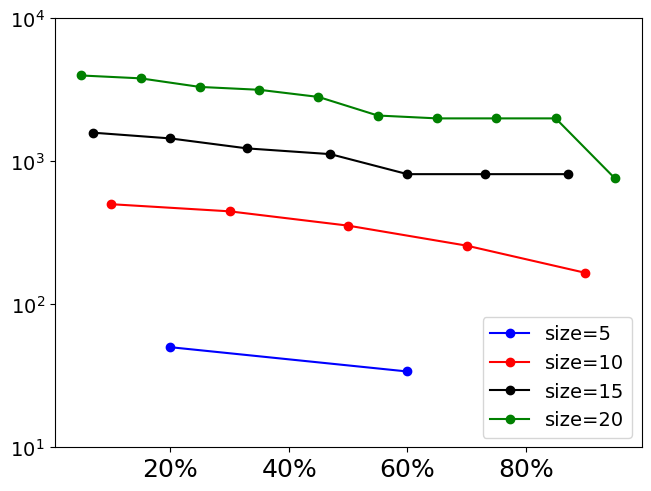

In [165]:
qubits_reduction = [[],[],[],[]]

for idx, t in enumerate(qubits_reduction):
        for s in range(1,(1+idx)*5,2):
            t.append(np.round(np.log10(random['random'+str((idx+1)*5)][str(s)]['gate_cuts']),2))

fig, ax = plt.subplots(layout='constrained')
colors = ['b','r','k','g','y','m','pink','brown']
idx = 0
for attribute, measurement in zip(n,subcirc_pet):
    ax.plot(measurement, qubits_reduction[idx], label=attribute, color=colors[idx],marker='o')
    # ax.bar_label(rects, padding=5, fontsize=10)
    idx += 1
xtick = [0.2,0.4,0.6,0.8]
perc = [int(100*i) for i in xtick]
ytick = [0,1,2,3,4,5]
# ys = [int(10**i) for i in ytick]
ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=14)
# label the classes:
ax.set_xticks(xtick, labels=[f'${i}\%$' for i in perc], fontsize=18)
ax.legend(loc='lower right', fontsize=14)
ax.set_ylim([1,4])
plt.show()
# width = 0.1  # the width of the bars
# multiplier = 0
# tick_pos = []
# fig, ax = plt.subplots(layout='constrained')
# hatches = ['/', '\\', '|', '-']
# pos = []
# for attribute, measurement in zip(n,subcirc_pet):
#     pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     rects = ax.bar([measurement[i]+multiplier+0.01 for i in range(len(measurement))], qubits_reduction[multiplier], width, label=attribute, edgecolor='black', hatch=hatches[multiplier])
#     tick_pos += [measurement[i]+multiplier+0.01 for i in range(len(measurement))] 
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(pos, labels=['20', '60', '10', '30', '50', '70', '90', '7', '', '', '47', '', '', '87', '5', '', '', '', '', '55', '', '', '', '95'], fontsize=16, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# # ax.set_ylabel('Number of cuts log scale', fontsize=18)
# # ax.set_title('2D square Ising model Physical Reduction')
# # ax.set_xlabel('Max number of qubits per subcircuit', fontsize=18)
# ax.legend(loc='upper left',fontsize=14)
# ax.set_ylim([0,4])
# plt.show()

In [ ]:
# all = [dataf['FH2 by 2']['two_qubit_gates']/dataf['FH2 by 2']['algorithmic_depth_qubits'],
#        dataf['FH3 by 3']['two_qubit_gates']/dataf['FH3 by 3']['algorithmic_depth_qubits'],
#        dataf['FH4 by 4']['two_qubit_gates']/dataf['FH4 by 4']['algorithmic_depth_qubits'],
#        data['Ising3 by 3']['two_qubit_gates']/data['Ising3 by 3']['algorithmic_depth_qubits'],
#        data['Ising4 by 4']['two_qubit_gates']/data['Ising4 by 4']['algorithmic_depth_qubits'],
#        data['Ising5 by 5']['two_qubit_gates']/data['Ising5 by 5']['algorithmic_depth_qubits'],
#        data['Ising6 by 6']['two_qubit_gates']/data['Ising6 by 6']['algorithmic_depth_qubits'],
#     datah['Heisenberg3 by 3']['two_qubit_gates']/datah['Heisenberg3 by 3']['algorithmic_depth_qubits'],
#     datah['Heisenberg4 by 4']['two_qubit_gates']/datah['Heisenberg4 by 4']['algorithmic_depth_qubits'],
#     datah['Heisenberg5 by 5']['two_qubit_gates']/datah['Heisenberg5 by 5']['algorithmic_depth_qubits'],
#     datah['Heisenberg6 by 6']['two_qubit_gates']/datah['Heisenberg6 by 6']['algorithmic_depth_qubits'],
#     random['random5']['two_qubit_gates']/random['random5']['algorithmic_depth_qubits'],
#     random['random10']['two_qubit_gates']/random['random10']['algorithmic_depth_qubits'],
#     random['random15']['two_qubit_gates']/random['random15']['algorithmic_depth_qubits'],
#     random['random20']['two_qubit_gates']/random['random20']['algorithmic_depth_qubits'],
#     Q['QAOA4']['two_qubit_gates']/Q['QAOA4']['algorithmic_depth_qubits'],
#     Q['QAOA6']['two_qubit_gates']/Q['QAOA6']['algorithmic_depth_qubits'],
#     Q['QAOA8']['two_qubit_gates']/Q['QAOA8']['algorithmic_depth_qubits'],
#     Q['QAOA10']['two_qubit_gates']/Q['QAOA10']['algorithmic_depth_qubits'],
#     QPE['QPE2']['two_qubit_gates']/QPE['QPE2']['algorithmic_depth_qubits'],
#     QPE['QPE4']['two_qubit_gates']/QPE['QPE4']['algorithmic_depth_qubits'],
#     QPE['QPE6']['two_qubit_gates']/QPE['QPE6']['algorithmic_depth_qubits'],
#     QPE['QPE8']['two_qubit_gates']/QPE['QPE8']['algorithmic_depth_qubits'],
#     bc['block_encoding2']['two_qubit_gates']/bc['block_encoding2']['algorithmic_depth_qubits'],
#     bc['block_encoding4']['two_qubit_gates']/bc['block_encoding4']['algorithmic_depth_qubits'],
#     bc['block_encoding6']['two_qubit_gates']/bc['block_encoding6']['algorithmic_depth_qubits'],
#     bc['block_encoding8']['two_qubit_gates']/bc['block_encoding8']['algorithmic_depth_qubits'],
#     data_qft['qft5']['two_qubit_gates']/data_qft['qft5']['algorithmic_depth_qubits'],
#     data_qft['qft10']['two_qubit_gates']/data_qft['qft10']['algorithmic_depth_qubits'],
#     data_qft['qft15']['two_qubit_gates']/data_qft['qft15']['algorithmic_depth_qubits'],
#     data_qft['qft20']['two_qubit_gates']/data_qft['qft20']['algorithmic_depth_qubits']]
#     data_qfts['qft30']['two_qubit_gates']/data_qft['qft30']['algorithmic_depth_qubits'],
#     data_qfts['qft40']['two_qubit_gates']/data_qft['qft40']['algorithmic_depth_qubits'],
#     data_qfts['qft50']['two_qubit_gates']/data_qft['qft50']['algorithmic_depth_qubits'],
#     data_qfts['qft60']['two_qubit_gates']/data_qft['qft60']['algorithmic_depth_qubits']

In [49]:
# all = [dataf['FH2 by 2']['two_qubit_gates']/dataf['FH2 by 2']['algorithmic_depth_qubits'],
#        dataf['FH3 by 3']['two_qubit_gates']/dataf['FH3 by 3']['algorithmic_depth_qubits'],
#        dataf['FH4 by 4']['two_qubit_gates']/dataf['FH4 by 4']['algorithmic_depth_qubits'],
#        data['Ising3 by 3']['two_qubit_gates']/data['Ising3 by 3']['algorithmic_depth_qubits'],
#        data['Ising4 by 4']['two_qubit_gates']/data['Ising4 by 4']['algorithmic_depth_qubits'],
#        data['Ising5 by 5']['two_qubit_gates']/data['Ising5 by 5']['algorithmic_depth_qubits'],
#        data['Ising6 by 6']['two_qubit_gates']/data['Ising6 by 6']['algorithmic_depth_qubits'],
#     datah['Heisenberg3 by 3']['two_qubit_gates']/datah['Heisenberg3 by 3']['algorithmic_depth_qubits'],
#     datah['Heisenberg4 by 4']['two_qubit_gates']/datah['Heisenberg4 by 4']['algorithmic_depth_qubits'],
#     datah['Heisenberg5 by 5']['two_qubit_gates']/datah['Heisenberg5 by 5']['algorithmic_depth_qubits'],
#     datah['Heisenberg6 by 6']['two_qubit_gates']/datah['Heisenberg6 by 6']['algorithmic_depth_qubits'],
#     random['random5']['two_qubit_gates']/random['random5']['algorithmic_depth_qubits'],
#     random['random10']['two_qubit_gates']/random['random10']['algorithmic_depth_qubits'],
#     random['random15']['two_qubit_gates']/random['random15']['algorithmic_depth_qubits'],
#     random['random20']['two_qubit_gates']/random['random20']['algorithmic_depth_qubits'],
#     Q['QAOA4']['two_qubit_gates']/Q['QAOA4']['algorithmic_depth_qubits'],
#     Q['QAOA6']['two_qubit_gates']/Q['QAOA6']['algorithmic_depth_qubits'],
#     Q['QAOA8']['two_qubit_gates']/Q['QAOA8']['algorithmic_depth_qubits'],
#     Q['QAOA10']['two_qubit_gates']/Q['QAOA10']['algorithmic_depth_qubits'],
#     QPE['QPE2']['two_qubit_gates']/QPE['QPE2']['algorithmic_depth_qubits'],
#     QPE['QPE4']['two_qubit_gates']/QPE['QPE4']['algorithmic_depth_qubits'],
#     QPE['QPE6']['two_qubit_gates']/QPE['QPE6']['algorithmic_depth_qubits'],
#     QPE['QPE8']['two_qubit_gates']/QPE['QPE8']['algorithmic_depth_qubits'],
#     bc['block_encoding2']['two_qubit_gates']/bc['block_encoding2']['algorithmic_depth_qubits'],
#     bc['block_encoding4']['two_qubit_gates']/bc['block_encoding4']['algorithmic_depth_qubits'],
#     bc['block_encoding6']['two_qubit_gates']/bc['block_encoding6']['algorithmic_depth_qubits'],
#     bc['block_encoding8']['two_qubit_gates']/bc['block_encoding8']['algorithmic_depth_qubits'],
#     data_qft['qft5']['two_qubit_gates']/data_qft['qft5']['algorithmic_depth_qubits'],
#     data_qft['qft10']['two_qubit_gates']/data_qft['qft10']['algorithmic_depth_qubits'],
#     data_qft['qft15']['two_qubit_gates']/data_qft['qft15']['algorithmic_depth_qubits'],
#     data_qft['qft20']['two_qubit_gates']/data_qft['qft20']['algorithmic_depth_qubits']]

# all = [dataf['FH2 by 2']['algorithmic_depth_qubits'],
#        dataf['FH3 by 3']['algorithmic_depth_qubits'],
#        dataf['FH4 by 4']['algorithmic_depth_qubits'],
#        data['Ising3 by 3']['algorithmic_depth_qubits'],
#        data['Ising4 by 4']['algorithmic_depth_qubits'],
#        data['Ising5 by 5']['algorithmic_depth_qubits'],
#        data['Ising6 by 6']['algorithmic_depth_qubits'],
#     datah['Heisenberg3 by 3']['algorithmic_depth_qubits'],
#     datah['Heisenberg4 by 4']['algorithmic_depth_qubits'],
#     datah['Heisenberg5 by 5']['algorithmic_depth_qubits'],
#     datah['Heisenberg6 by 6']['algorithmic_depth_qubits'],
#     random['random5']['algorithmic_depth_qubits'],
#     random['random10']['algorithmic_depth_qubits'],
#     random['random15']['algorithmic_depth_qubits'],
#     random['random20']['algorithmic_depth_qubits'],
#     Q['QAOA4']['algorithmic_depth_qubits'],
#     Q['QAOA6']['algorithmic_depth_qubits'],
#     Q['QAOA8']['algorithmic_depth_qubits'],
#     Q['QAOA10']['algorithmic_depth_qubits'],
#     QPE['QPE2']['algorithmic_depth_qubits'],
#     QPE['QPE4']['algorithmic_depth_qubits'],
#     QPE['QPE6']['algorithmic_depth_qubits'],
#     QPE['QPE8']['algorithmic_depth_qubits'],
#     bc['block_encoding2']['algorithmic_depth_qubits'],
#     bc['block_encoding4']['algorithmic_depth_qubits'],
#     bc['block_encoding6']['algorithmic_depth_qubits'],
#     bc['block_encoding8']['algorithmic_depth_qubits'],
#     data_qft['qft5']['algorithmic_depth_qubits'],
#     data_qft['qft10']['algorithmic_depth_qubits'],
#     data_qft['qft15']['algorithmic_depth_qubits'],
#     data_qft['qft20']['algorithmic_depth_qubits']]

# all_phy = [dataf['FH2 by 2']['overall_physical_qubits'],
#        dataf['FH3 by 3']['overall_physical_qubits'],
#        dataf['FH4 by 4']['overall_physical_qubits'],
#        data['Ising3 by 3']['overall_physical_qubits'],
#        data['Ising4 by 4']['overall_physical_qubits'],
#        data['Ising5 by 5']['overall_physical_qubits'],
#        data['Ising6 by 6']['overall_physical_qubits'],
#     datah['Heisenberg3 by 3']['overall_physical_qubits'],
#     datah['Heisenberg4 by 4']['overall_physical_qubits'],
#     datah['Heisenberg5 by 5']['overall_physical_qubits'],
#     datah['Heisenberg6 by 6']['overall_physical_qubits'],
#     random['random5']['overall_physical_qubits'],
#     random['random10']['overall_physical_qubits'],
#     random['random15']['overall_physical_qubits'],
#     random['random20']['overall_physical_qubits'],
#     Q['QAOA10']['overall_physical_qubits'],
#     Q['QAOA20']['overall_physical_qubits'],
#     Q['QAOA30']['overall_physical_qubits'],
#     Q['QAOA40']['overall_physical_qubits'], 
#     Q['QAOA50']['overall_physical_qubits'],
#     Q['QAOA60']['overall_physical_qubits'],
#     Q['QAOA70']['overall_physical_qubits'],
#     Q['QAOA80']['overall_physical_qubits'],
#     Q['QAOA90']['overall_physical_qubits'],
#     Q['QAOA100']['overall_physical_qubits'],
#     QPE['QPE2']['overall_physical_qubits'],
#     QPE['QPE4']['overall_physical_qubits'],
#     QPE['QPE6']['overall_physical_qubits'],
#     QPE['QPE8']['overall_physical_qubits'],
#     bc['block_encoding2']['overall_physical_qubits'],
#     bc['block_encoding3']['overall_physical_qubits'],
#     bc['block_encoding4']['overall_physical_qubits'],
#     bc['block_encoding5']['overall_physical_qubits'],
#     data_qft['qft5']['overall_physical_qubits'],
#     data_qft['qft10']['overall_physical_qubits'],
#     data_qft['qft15']['overall_physical_qubits'],
#     data_qft['qft20']['overall_physical_qubits']]

In [50]:
# data_qft['qft10']['algorithmic_depth_qubits']

In [51]:
# width = 0.5  # the width of the bars
# multiplier = 1
# fig, ax = plt.subplots(figsize=(16, 8))
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*','//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**','/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-','.*']
# pos = []
# n = ['FH2 by 2','FH3 by 3','FH4 by 4','Ising3 by 3','Ising4 by 4','Ising5 by 5','Ising6 by 6','Heisenberg3 by 3','Heisenberg4 by 4','Heisenberg5 by 5','Heisenberg6 by 6',
#                                        'random5','random10','random15','random20','QAOA4','QAOA6','QAOA8','QAOA10','QPE2','QPE4','QPE6','QPE8','block_encoding2','block_encoding4','block_encoding6','block_encoding8','qft5','qft10','qft15','qft20']
# for attribute, measurement in zip(n,all_phy):
#     rects = ax.bar(multiplier, np.round(np.log10(measurement),2), width, label=attribute, edgecolor='black', hatch=hatches[multiplier-1])
#     ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(np.arange(1,32), labels=['FH2 by 2','FH3 by 3','FH4 by 4','Ising3 by 3','Ising4 by 4','Ising5 by 5','Ising6 by 6','Heisenberg3 by 3','Heisenberg4 by 4','Heisenberg5 by 5','Heisenberg6 by 6',
#                                        'random5','random10','random15','random20','QAOA4','QAOA6','QAOA8','QAOA10','QPE2','QPE4','QPE6','QPE8','block encoding2','block encoding4','block encoding6','block encoding8','qft5','qft10','qft15','qft20'], fontsize=12, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=12)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of physical qubits log scale', fontsize=16)
# ax.set_xlabel('Quantum Algorithms', fontsize=14)
# # ax.legend(loc='upper left')
# ax.set_ylim([0,5.5])
# plt.show()

In [52]:
# width = 0.5  # the width of the bars
# multiplier = 1
# fig, ax = plt.subplots(figsize=(16, 8))
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*','//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**','/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-','.*']
# pos = []
# n = ['FH2 by 2','FH3 by 3','FH4 by 4','Ising3 by 3','Ising4 by 4','Ising5 by 5','Ising6 by 6','HB3 by 3','HB4 by 4','HB5 by 5','HB6 by 6',
#                                        'random5','random10','random15','random20','QAOA4','QAOA6','QAOA8','QAOA10','QPE2','QPE4','QPE6','QPE8','BE2','BE4','BE6','BE8','qft5','qft10','qft15','qft20']
# for attribute, measurement in zip(n,all_phy):
#     rects = ax.bar(multiplier, np.round(np.log10(measurement),2), width, label=attribute, edgecolor='black', hatch=hatches[multiplier-1])
#     # ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(np.arange(1,32), labels=n, fontsize=18, rotation=75)
# # ax.set_xticks(np.arange(1,32), labels=['FH2 by 2','FH3 by 3','FH4 by 4','Ising3 by 3','Ising4 by 4','Ising5 by 5','Ising6 by 6','Heisenberg3 by 3','Heisenberg4 by 4','Heisenberg5 by 5','Heisenberg6 by 6',
# #                                        'random5','random10','random15','random20','QAOA4','QAOA6','QAOA8','QAOA10','QPE2','QPE4','QPE6','QPE8','block encoding2','block encoding4','block encoding6','block encoding8','qft5','qft10','qft15','qft20'], fontsize=12, rotation=75)
# ytick = [0,1,2,3,4,5]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=18)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Number of physical qubits log scale', fontsize=18)
# ax.set_xlabel('Quantum Algorithms', fontsize=18)
# # ax.legend(loc='upper left')
# ax.set_ylim([0,5.5])
# plt.show()

TypeError: 'builtin_function_or_method' object is not iterable

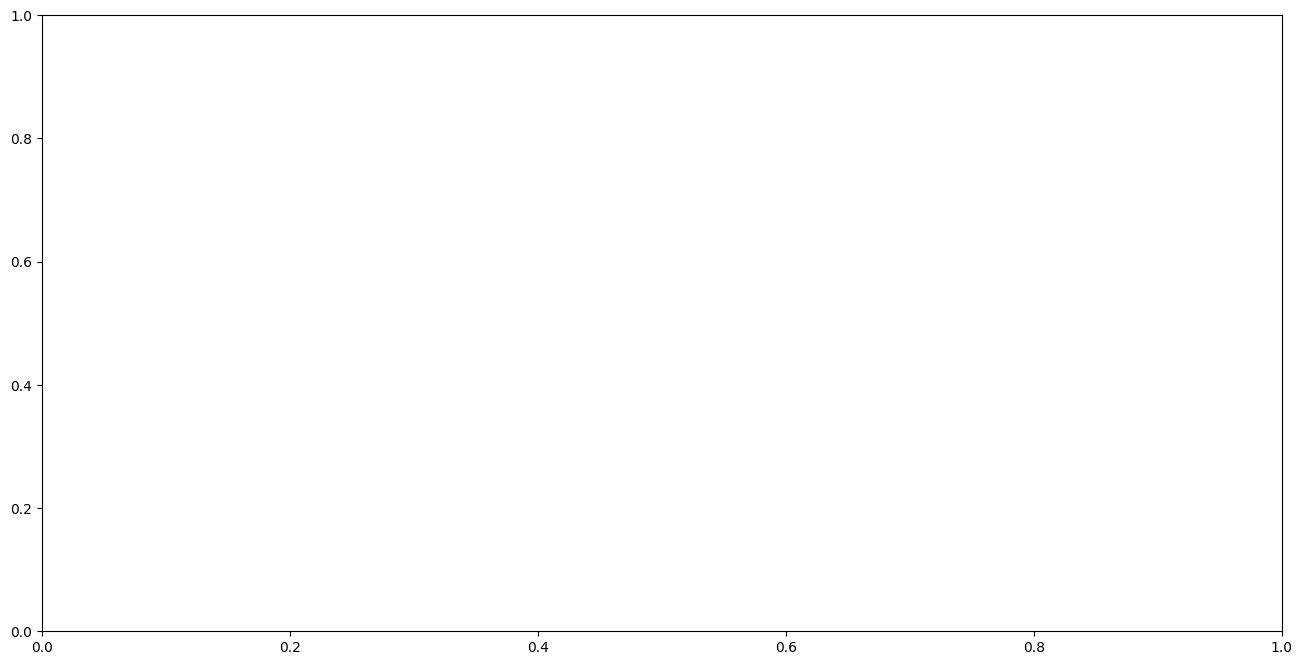

In [ ]:
# width = 0.5  # the width of the bars
# multiplier = 1
# fig, ax = plt.subplots(figsize=(16, 8))
# hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*','//', '\\\\', '||', '--', '++', 'xx', 'oo', 'OO', '..', '**','/o', '\\|', '|*', '-\\', '+o', 'x*', 'o-', 'O|', 'O.', '*-','.*']
# pos = []
# n = ['FH2 by 2','FH3 by 3','FH4 by 4','Ising3 by 3','Ising4 by 4','Ising5 by 5','Ising6 by 6','Heisenberg3 by 3','Heisenberg4 by 4','Heisenberg5 by 5','Heisenberg6 by 6',
#                                        'random5','random10','random15','random20','QAOA4','QAOA6','QAOA8','QAOA10','QPE2','QPE4','QPE6','QPE8','block_encoding2','block_encoding4','block_encoding6','block_encoding8','qft5','qft10','qft15','qft20']
# for attribute, measurement in zip(n,all):
#     rects = ax.bar(multiplier, np.round(np.log10(measurement),2), width, label=attribute, edgecolor='black', hatch=hatches[multiplier-1])
#     ax.bar_label(rects, padding=6, fontsize=10, rotation=75)
#     multiplier += 1

# # label the classes:
# ax.set_xticks(np.arange(1,32), labels=['FH2 by 2','FH3 by 3','FH4 by 4','Ising3 by 3','Ising4 by 4','Ising5 by 5','Ising6 by 6','Heisenberg3 by 3','Heisenberg4 by 4','Heisenberg5 by 5','Heisenberg6 by 6',
#                                        'random5','random10','random15','random20','QAOA4','QAOA6','QAOA8','QAOA10','QPE2','QPE4','QPE6','QPE8','block encoding2','block encoding4','block encoding6','block encoding8','qft5','qft10','qft15','qft20'], fontsize=12, rotation=75)
# ytick = [0,1,2,3,4,5,6]
# ax.set_yticks(ytick, labels=[f'$10^{i}$' for i in ytick], fontsize=12)
# # # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Circuit algorithmic depth', fontsize=16)
# ax.set_xlabel('Quantum Algorithms', fontsize=14)
# # ax.legend(loc='upper left')
# ax.set_ylim([0,6])
# plt.show()